In the next few posts, I will be going over a strategy that uses Machine Learning to determine what trades to execute. Before we start going over the strategy, we will go over one of the algorithms it uses: Gradient Ascent.

## What is Gradient Ascent?

Gradient ascent is an algorithm used to maximize a given reward function. A common method to describe gradient ascent uses the following scenario: Imagine you are blindfolded and placed somewhere on a mountain. Your task is then to find the highest point of the mountain. In this scenario, the "reward function" you are trying to maximize is your elevation. A simple method of locating this maximum would be observing the slope of the area you are standing on, and moving uphill. Following these directions one step at a time would eventually lead you to the top! 

While making our way up the mountain, it was important that we knew the slope, or gradient, of the area, so we could know which direction to travel. This `gradient` is simply the derivative of the reward function with respect to its parameters.

Another important piece of gradient ascent is `learning rate`. This is equivalent to the number of steps we take before checking the slope again. Too many steps, and we could overshoot the summit; too few steps, and finding the peak would take way too long. Similarly, a high `learning rate` may lead the algorithm to diverge from the maximum, while a low `learing rate` might result in the algorithm taking too long to finish.  

Now that we understand the basics of gradient ascent, let's use it to perform a relatively simple task: linear regression.

## Example: Linear Regression using Gradient Ascent

Let's first generate some data to perform linear regression with.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5, 3) # (w, h)
plt.rcParams["figure.dpi"] = 200

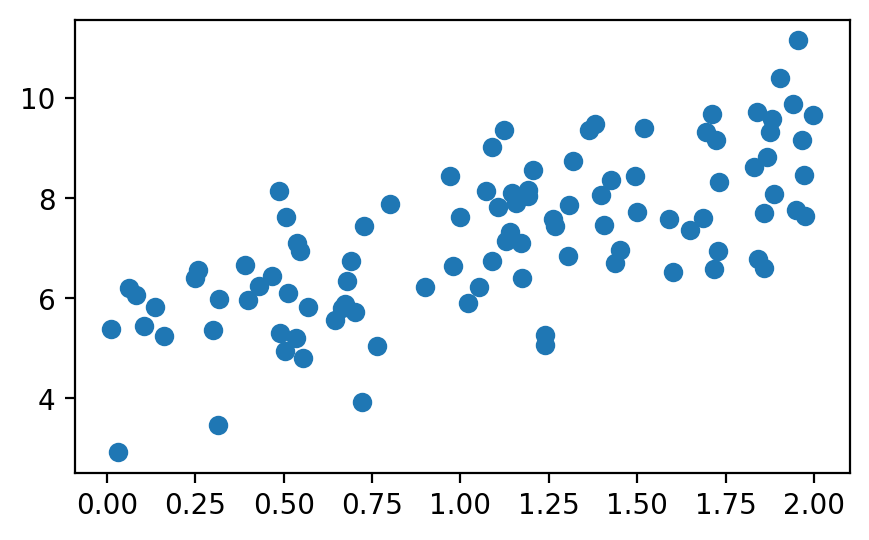

In [2]:
m = 100
x = 2 * np.random.rand(m)
y = 5 + 2 * x + np.random.randn(m)
plt.scatter(x, y);

We generated 100 points placed randomly around a line with an intercept of 5, and a slope of 2. Just so we have a benchmark, we can find the line of best fit using scipy's `lingregress` function:

In [3]:
from scipy.stats import linregress
slope, intercept = linregress(x, y)[:2]
print(f"slope: {slope:.3f}, intercept: {intercept:.3f}")

slope: 1.897, intercept: 5.130


These will be the values to shoot for with our gradient ascent algorithm.

### Reward Function

The next step is to define our reward function. A commonly used function when measuring the accuracy of linear regression is [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) (MSE). MSE is the "average squared difference between the estimated values and what is estimated." Since MSE is an *error* function, and we are looking for a function to maximized we will use negative MSE as our reward function, $J$:  

$$J(\theta) = - {1 \over m} \sum\limits_{i=1}^{m}(\theta _{0} + \theta _{1}x^{(i)} - y^{(i)})^2$$

Where $\theta$ is our input parameters, in this case the intercept and slope of the line we are testing. This equation can be represented in Python like so:

In [4]:
x = np.array([np.ones(m), x]).transpose()
def accuracy(x, y, theta):
    return - 1 / m * np.sum((np.dot(x, theta) - y) ** 2)

From here on I have made $x$ a matrix where $x_0 = 1$ and $x_1$ are the original x values. This makes it so $\theta_ {0} + \theta_ {1} x$ can be computed with just $\theta \cdot x$.

### Gradient Function

Now that we have our reward function, we can find our gradient function which will be the partial derivative of $J$ with respect to $\theta$:

$${\partial J(\theta)\over \partial\theta} = - {2 \over m} \sum\limits_{i=1}^{m}(\theta _{0} + \theta _{1}x^{(i)} - y^{(i)}) \cdot x^{(i)}$$

Once again we can write this function in Python:

In [5]:
def gradient(x, y, theta):
    return -1 / m * x.T.dot(np.dot(x, theta) - y)

### Training

Now we are ready to perform gradient ascent! We will initialize $\theta$ as $[0, 0]$, and update it every epoch, or step using: $\theta = \theta + \alpha{\partial J(\theta) \over \partial\theta}$, where $\alpha$ is our learning rate.

In [22]:
num_epochs = 500
learning_rate = 0.1

def train(x, y):
    accs = []
    thetas = []
    theta = np.zeros(2)
    for _ in range(num_epochs):
        # keep track of accuracy and theta over time
        acc = accuracy(x, y, theta)
        thetas.append(theta)
        accs.append(acc)
        
        # update theta
        theta = theta + learning_rate * gradient(x, y, theta)
        
    return theta, thetas, accs

theta, thetas, accs = train(x, y)
print(f"slope: {theta[1]:.3f}, intercept: {theta[0]:.3f}")

slope: 1.899, intercept: 5.128


We matched the linear regression benchmark! If we graph the accuracy over time, we can see that the algorithm quickly converges to a maximum accuracy:

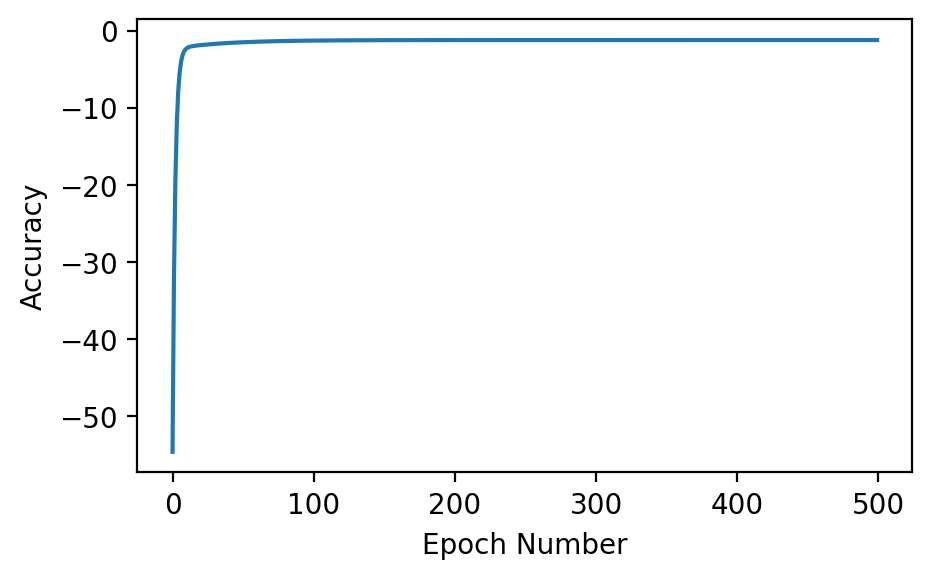

In [23]:
plt.plot(accs)
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy');

Finally, if we project our reward function onto a 3D surface and mark our $\theta_0$ and $\theta_1$ over time, we can see our gradient ascent algorithm gradually finding its way to the maximum:

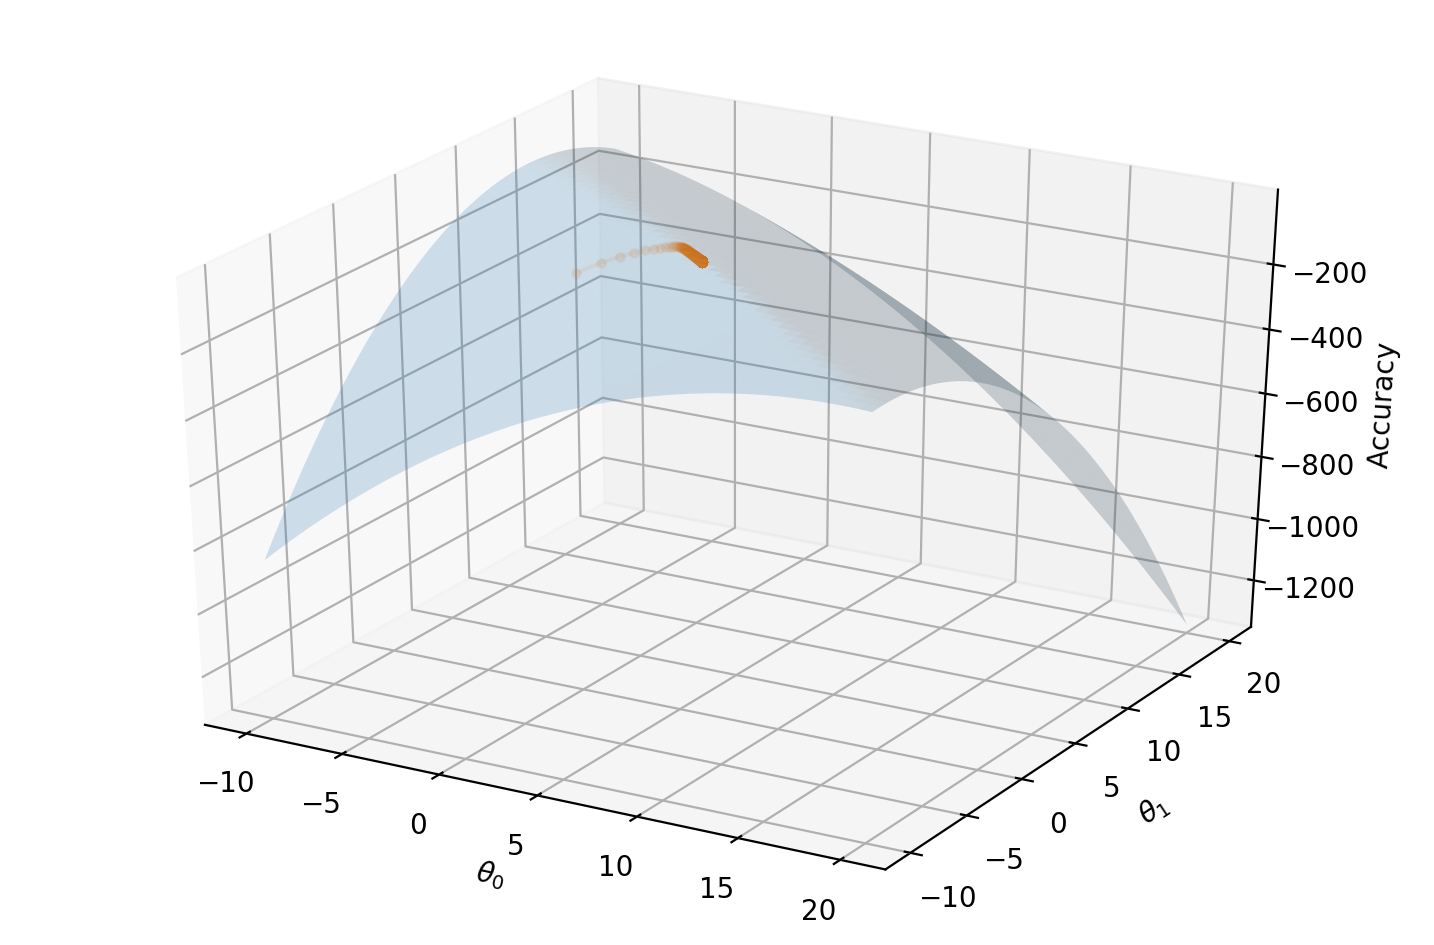

In [24]:
from mpl_toolkits.mplot3d import Axes3D
i = np.linspace(-10, 20, 50)
j = np.linspace(-10, 20, 50)
i, j = np.meshgrid(i, j)
k = np.array([accuracy(x, y, th) for th in zip(np.ravel(i), np.ravel(j))]).reshape(i.shape)
fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d')
ax.plot_surface(i, j, k, alpha=0.2)
ax.plot([t[0] for t in thetas], [t[1] for t in thetas], accs, marker="o", markersize=3, alpha=0.1);
ax.set_xlabel(r'$\theta_0$'); ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel("Accuracy");

# Conclusion

In this post we showed how gradient ascent can be used to maximize a relatively simple reward function with only two parameters. In the next post we will see how a reward function can be applied to a trading strategy in order to train a algorithmic trading model. As always, the notebooks for each post are available on my [Github](https://github.com/teddykoker/blog/tree/master/notebooks).